# Executing simulation projects (COMBINE/OMEX archives)

This tutorial illustrates how to use Docker images, command-line programs, and Python APIs for simulation tools to execute [COMBINE/OMEX archives](https://combinearchive.org/) that contain simulation experiments described with the [Simulation Experiment Description Markup Language (SED-ML)](http://sed-ml.org/) and plot their results.

Information about the capabilities (supported model formats, modeling frameworks, simulation types, simulation algorithms, observables) of each simulation tool is available from [BioSimulators](https://biosimulators.org). These capabilties are described using several ontologies. Please see the [Programmatically getting information about simulation tools from BioSimulators tutorial](../4.%20Finding%20simulation%20tools/Programmatically%20getting%20information%20about%20simulation%20tools%20from%20BioSimulators.ipynb) for more information about how to use this information to identify and use appropriate simulation tools.

## 1. Execute a COMBINE/OMEX archive using a Docker image

<div class="alert alert-block alert-info">
    A functional demo is not available here because this functionality requires Docker, which is difficult to embed inside Docker which is being used to run this Jupyter server.
</div>

First, install [Docker](https://www.docker.com/). Second, pull the Docker image for a simulation tool, such as [COPASI](https://biosimulators.org/simulators/copasi). Separate tags are available for each version of each simulation tool. The image URLs and version tags for each simulation tool are available from https://biosimulators.org.

The entrypoint of each BioSimulators Docker image is the command-line program for the simulation tool. Inline help for this command-line program is available by running the Docker image with the `--help` option.

Next, use the entrypoint to execute a COMBINE/OMEX archive by binding local directories to the Docker container.

The [BioSimulators-utils](https://github.com/biosimulators/Biosimulators_utils) command-line application provides convenience method for using Docker images to execute simulations. This can be used as illustrated below. Instructions for installing BioSimulators-utils are available at [https://docs.biosimulators.org](https://docs.biosimulators.org/Biosimulators_utils).

## 2. Execute a COMBINE/OMEX archive using a command-line program

First, install the command-line interface for a tool, such as [COPASI](https://biosimulators.org/simulators/copasi). A Docker image for COPASI is also available ([`ghcr.io/biosimulators/copasi`](https://github.com/biosimulators/Biosimulators/pkgs/container/copasi)).

In [1]:
!pip install biosimulators-copasi

Invalid -W option ignored: invalid module name: 'biosimulators_utils.warnings'
Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-info">
    Some command-line programs require additional dependencies that cannot be install with pip. Please see <a href="https://biosimulators.org">https://biosimulators.org</a> for installation instructions for each tool.
</div>

Inline help for the command-line program is available by running the program with the `--help` option.

In [2]:
!biosimulators-copasi --help

Invalid -W option ignored: invalid module name: 'biosimulators_utils.warnings'
usage: biosimulators-copasi [-h] [-d] [-q] -i ARCHIVE [-o OUT_DIR] [-v]

BioSimulators-compliant command-line interface to the COPASI simulation program <http://copasi.org>.

In addition to the command-line arguments outlined below, COPASI also supports the following environment variables:

  'ALGORITHM_SUBSTITUTION_POLICY': Policy for substituting alternative algorithms.
    Options: 'ANY', 'DISTINCT_APPROXIMATIONS', 'DISTINCT_SCALES', 'NONE', 'SAME_FRAMEWORK', 'SAME_MATH', 'SAME_METHOD', 'SAME_VARIABLES', 'SIMILAR_APPROXIMATIONS', 'SIMILAR_VARIABLES'
    Default value: 'SIMILAR_VARIABLES'
    More information: https://docs.biosimulations.org/concepts/conventions/simulator-interfaces/

  'BUNDLE_OUTPUTS': Whether to bundle all of the exported reports and plots generated by the execution of a COMBINE/OMEX archive into zip files for all reports and all plots.
    Options: '0', '1'
    Default value: '1'
    M

Next, use the command-line program to execute a [COMBINE/OMEX archive](../_data/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous.omex).

In [3]:
!biosimulators-copasi \
    --archive ../_data/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous.omex \
    --out-dir tmp/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous-outputs

Invalid -W option ignored: invalid module name: 'biosimulators_utils.warnings'
/usr/local/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: The SED document is potentially incorrect.
  - Model `Ciliberto2003_Morphogenesis` may be invalid.
    - The model file `BIOMD0000000297_url.xml` may be invalid.
      - The value of the 'sboTerm' attribute on a <species> is expected to be an SBO identifier (http://www.biomodels.net/SBO/). In SBML Level 2 prior to Version 4 it is expected to refer to a participant physical type (i.e., terms derived from SBO:0000236, "participant physical type"); in Versions 4 and above it is expected to refer to a material entity (i.e., terms derived from SBO:0000240, "material entity").
        Reference: L2V4 Section 5
         SBO term 'SBO:0000014' on the <species> is not in the appropriate branch.
        
      - The value of the 'sboTerm' attribute on a <species> is expected to be an SBO identifier (http://www.biomodels.ne

Finally, view the generated reports and plots in `tmp/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous-outputs`.

In [4]:
from IPython.display import IFrame
IFrame('tmp/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous-outputs/simulation_1.sedml/Figure_3a.pdf', width=600, height=300)

## 3. Execute a COMBINE/OMEX archive using a Python API

### 3.1 Install a Python API for a simulation tool

First, install the Python API for a tool, such as [COPASI](https://biosimulators.org/simulators/copasi). A Docker image for COPASI is also available ([`ghcr.io/biosimulators/copasi`](https://github.com/biosimulators/Biosimulators/pkgs/container/copasi)).

In [5]:
!pip install biosimulators-copasi

Invalid -W option ignored: invalid module name: 'biosimulators_utils.warnings'
Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-info">
    Some Python API require additional dependencies that cannot be install with pip. Please see <a href="https://biosimulators.org">https://biosimulators.org</a> for installation instructions for each tool.
</div>

### 3.2. Import an API for a simulation tool

For example, run the following code to import the Python API for COPASI. The names of the Python modules which provide these APIs are available from [BioSimulators](https://biosimulators.org).

In [6]:
import biosimulators_copasi

### 3.3 Use the API to execute a COMBINE/OMEX archive

Choose a COMBINE/OMEX archive to execute, such as the [Ciliberto et al. morphogensis checkpoint model](https://doi.org/10.1083/jcb.200306139).

In [7]:
archive_filename = '../_data/Ciliberto-J-Cell-Biol-2003-morphogenesis-checkpoint-continuous.omex'

Choose a directory to save the outputs of the COMBINE/OMEX archive.

In [8]:
import tempfile
output_dirname = tempfile.mkdtemp()

Set up the configuration for running COPASI. More information about the available options is available at [https://docs.biosimulators.org](https://docs.biosimulators.org/Biosimulators_utils/source/biosimulators_utils.html#module-biosimulators_utils.config).

In [9]:
from biosimulators_utils.config import Config
config = Config(
    COLLECT_COMBINE_ARCHIVE_RESULTS=True,
    REPORT_FORMATS=[],
    VIZ_FORMATS=[],
    LOG=False,
)

In [10]:
outputs, log = biosimulators_copasi.exec_sedml_docs_in_combine_archive(archive_filename, output_dirname, 
                                                                       config=config)

/usr/local/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: StandardOutputNotLoggedWarning: Standard output and error could not be logged because capturer is not installed. To install capturer, install BioSimulators utils with the `logging` option (`pip install biosimulators-utils[logging]`).
  warnings.warn(termcolor.colored(message, Colors.warning.value), category)


Archive contains 1 SED-ML documents with 1 models, 1 simulations, 1 tasks, 1 reports, and 4 plots:
  simulation_1.sedml:
    Tasks (1):
      task_1
    Reports (1):
      report: 21 data sets
    Plots (4):
      Figure_3a: 4 curves
      Figure_3b: 4 curves
      Figure_3c: 4 curves
      Figure_3d: 1 curves

Executing SED-ML file 1: simulation_1.sedml ...
  Found 1 tasks and 5 outputs:
    Tasks:
      `task_1`
    Outputs:
      `Figure_3a`
      `Figure_3b`
      `Figure_3c`
      `Figure_3d`
      `report`
  Executing task 1: `task_1`
    Executing simulation ...

/usr/local/lib/python3.9/site-packages/biosimulators_utils/warnings.py:31: BioSimulatorsWarning: The SED document is potentially incorrect.
  - Model `Ciliberto2003_Morphogenesis` may be invalid.
    - The model file `BIOMD0000000297_url.xml` may be invalid.
      - The value of the 'sboTerm' attribute on a <species> is expected to be an SBO identifier (http://www.biomodels.net/SBO/). In SBML Level 2 prior to Version 4 it is expected to refer to a participant physical type (i.e., terms derived from SBO:0000236, "participant physical type"); in Versions 4 and above it is expected to refer to a material entity (i.e., terms derived from SBO:0000240, "material entity").
        Reference: L2V4 Section 5
         SBO term 'SBO:0000014' on the <species> is not in the appropriate branch.
        
      - The value of the 'sboTerm' attribute on a <species> is expected to be an SBO identifier (http://www.biomodels.net/SBO/). In SBML Level 2 prior to Version 4 it is expected to refer to a partic

 succeeded
    Generating 5 outputs ...
      Generating output 1: `report` ... succeeded
      Generating output 2: `Figure_3a` ... succeeded
      Generating output 3: `Figure_3b` ...

/usr/local/lib/python3.9/site-packages/kisao/utils.py:477: AlgorithmSubstitutedWarning: 'LSODA/LSODAR hybrid method' (KISAO_0000560) will be substituted for 'CVODE'' (KISAO_0000019) at substitution policy 'SIMILAR_VARIABLES'.
  warnings.warn(termcolor.colored(msg, 'yellow'), AlgorithmSubstitutedWarning)


 succeeded
      Generating output 4: `Figure_3c` ... succeeded
      Generating output 5: `Figure_3d` ... succeeded

Bundling outputs ...
Cleaning up ...


The value of `log` is `None` because we turned off logging via the configuration.

### 3.4 Plot the outputs for the COMBINE/OMEX archive

The outputs are returned as a hierarchically organized collection of `numpy.ndarray`s for each SED-ML data set of each SED-ML report and each SED-ML data generator of each SED-ML curve and surface of each SED-ML plot for each SED-ML document in the COMBINE/OMEX archive. Below is a schematic summary of the structure of the outputs.

- sedml_document_location_1:
  - sedml_report_plot_id_1:
     - sedml_data_set_id_1: `numpy.ndarray` of results


For example, run the following code to extract and plot the predicted time course for Sic1.

In [11]:
time = outputs['./simulation_1.sedml']['report']['data_set_time']
sic1 = outputs['./simulation_1.sedml']['report']['data_set_Sic']

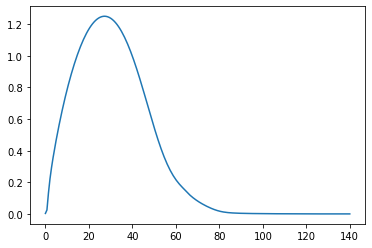

In [12]:
%matplotlib inline
from matplotlib import pyplot
pyplot.plot(time, sic1)